In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression 
data = pd.read_csv('/famabliss.txt', sep="\s+")
# print(data)
#data=data.iloc[:,[6,12]]

In [ ]:

d=np.array(data['yield1'])
d=d.reshape(-1,1)
# d.dtype

In [ ]:
model=LinearRegression().fit(x,data['yield3'])


In [ ]:
model.intercept_,model.coef_

(0.7126447045729511, array([0.94081626]))

In [ ]:
ypred=model.predict(x)
error=data['yield3']-ypred
error

0      0.034064
1     -0.199632
2     -0.290249
3     -0.203669
4     -0.048296
         ...   
631   -0.042175
632   -0.177543
633   -0.223951
634   -0.285879
635   -0.067643
Name: yield3, Length: 636, dtype: float64

In [ ]:
error.mean()

-6.251114231419317e-16

In [ ]:
np.var(error)

0.2789269004688504

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


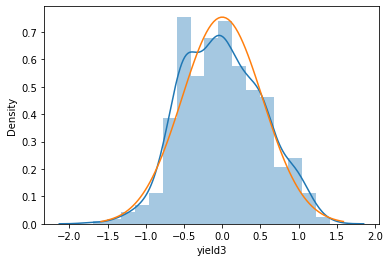

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(error)
import scipy.stats as stats
import math

mu = error.mean()
variance = error.var()
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()


In [ ]:
btc=pd.read_csv('/btc1.csv')
btc['price']=btc['Closing Price (USD)']

In [ ]:
btc['log_ret'] = np.log(btc.price) - np.log(btc.price.shift(1))


In [ ]:
btc.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),price,log_ret
0,BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349,123.65499,NaN
1,BTC,2013-10-02,125.45500,123.65499,125.75850,123.63383,125.45500,0.014452
2,BTC,2013-10-03,108.58483,125.45500,125.66566,83.32833,108.58483,-0.144415
3,BTC,2013-10-04,118.67466,108.58483,118.67500,107.05816,118.67466,0.088854
4,BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566,121.33866,0.022200


In [ ]:
!pip install arch
from arch import arch_model
am = arch_model(btc['log_ret'][1:])
res = am.fit()
print(res.summary())


     |████████████████████████████████| 798kB 6.0MB/s 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Iteration:      1,   Func. Count:      6,   Neg. LLF: -2560.636094757584
Iteration:      2,   Func. Count:     20,   Neg. LLF: -2561.8755062913083
Iteration:      3,   Func. Count:     31,   Neg. LLF: -2562.0613148228986
Iteration:      4,   Func. Count:     43,   Neg. LLF: -2562.2742633967755
Iteration:      5,   Func. Count:     56,   Neg. LLF: -2562.2772691228947
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -2562.277264153156
            Iterations: 7
            Function evaluations: 65
            Gradient evaluations: 5
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                log_ret   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:                2562.28
Distribution:                  Normal   AIC:                          -5116.55
Method:            Maximum 

/usr/local/lib/python3.6/dist-packages/arch/univariate/base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001804. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


In [ ]:
ibm=pd.read_csv('/m-ibmsp-6115.txt',sep="\s+")
ibm.columns

Index(['PERMNO', 'date', 'ibm', 'sprtrn'], dtype='object')

In [ ]:
ibm['log_rtn']=np.log(ibm.sprtrn+1)


In [ ]:
ret=ibm['log_rtn'].dropna()
ret.shape

(660,)

In [ ]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(ret)


1.8682662245809885

In [ ]:
# We got test-statistics close to 2. so there is no serial autocorrealtion